In [3]:
import numpy as np
import seaborn

%load_ext autoreload
%autoreload 2


## Neuron Ablation

Neuron count 2: Mean=50.00%, SD=0.00% from 5 samples
Neuron count 3: Mean=78.02%, SD=0.57% from 5 samples
Neuron count 4: Mean=72.11%, SD=1.56% from 5 samples
Neuron count 5: Mean=79.10%, SD=1.31% from 5 samples
Neuron count 6: Mean=69.01%, SD=1.82% from 5 samples
Neuron count 7: Mean=74.39%, SD=2.23% from 5 samples
Neuron count 8: Mean=74.86%, SD=2.15% from 5 samples
Neuron count 9: Mean=69.19%, SD=1.25% from 5 samples
Neuron count 10: Mean=73.63%, SD=2.06% from 5 samples


/var/folders/g4/b0tp89t57dbbzgsx2sl8tcq00000gn/T/ipykernel_15100/1052541162.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


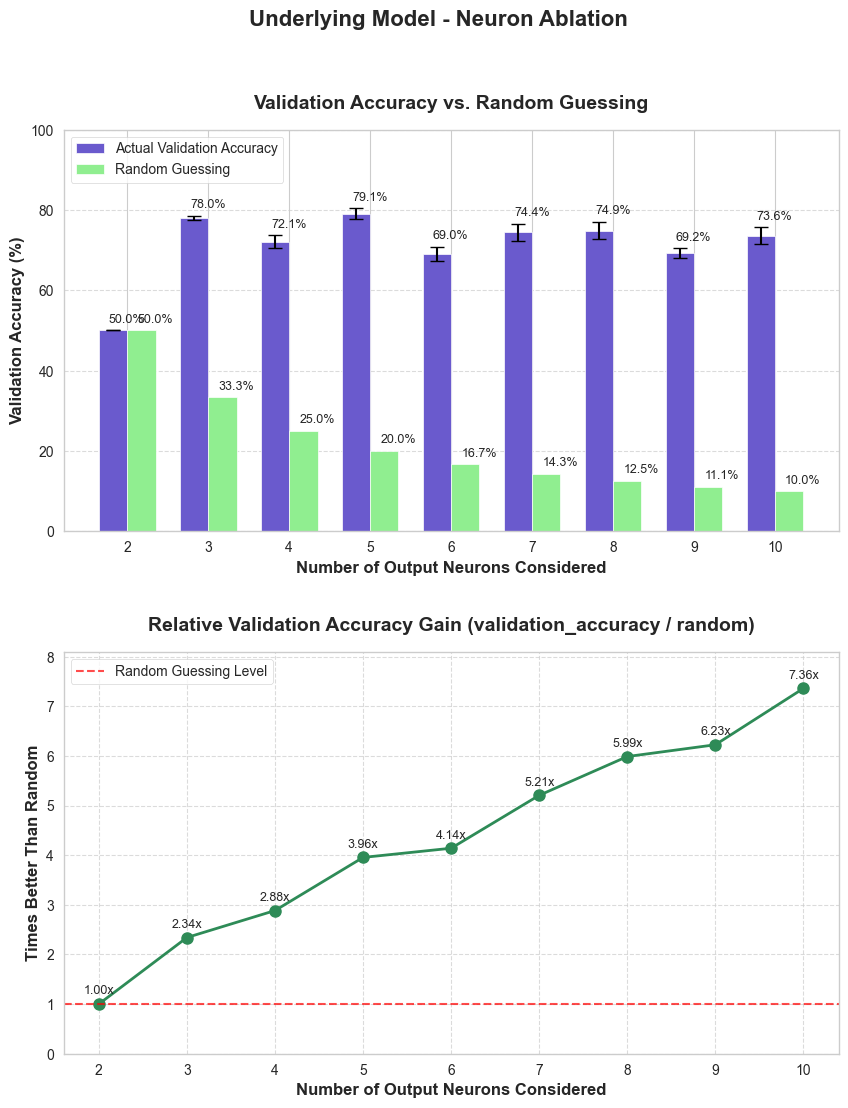

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set style for better-looking plots
plt.style.use('ggplot')
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Load data
df = pd.read_csv('../data/mnist_ablation_results.csv')

# Group data by neuron count
neurons = list(range(2, 11))
results = []

for n in neurons:
    # Filter data for this neuron count
    neuron_data = df[df['num_neurons'] == n]
    
    # Calculate mean and standard deviation of validation accuracy
    acc_mean = neuron_data['valid_acc'].mean()
    acc_std = neuron_data['valid_acc'].std(ddof=1)  # Using sample standard deviation
    
    # Print information for verification
    print(f"Neuron count {n}: Mean={acc_mean*100:.2f}%, SD={acc_std*100:.2f}% from {len(neuron_data)} samples")
    
    # Calculate random guessing validation accuracy
    random_guess = 1/n
    
    # Calculate gains over random guessing
    additive_gain = acc_mean - random_guess
    relative_gain = acc_mean / random_guess
    
    results.append({
        'neurons': n,
        'validation_accuracy': acc_mean * 100,  # Convert to percentage
        'std_dev': acc_std * 100,  # Convert to percentage
        'random_guess': random_guess * 100,  # Convert to percentage
        'additive_gain': additive_gain * 100,  # How many percentage points above random
        'relative_gain': relative_gain  # How many times better than random
    })

# Convert to DataFrame and sort by neuron count
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('neurons')

# Create a nice figure with 2 subplots in a grid
fig = plt.figure(figsize=(10, 12))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.3)

# Plot 1: Validation Accuracy vs Random Guessing
ax1 = plt.subplot(gs[0])

# Set width of bars
barWidth = 0.35
r1 = np.arange(len(neurons))
r2 = [x + barWidth for x in r1]

# Create grouped bars
ax1.bar(r1, results_df['validation_accuracy'], width=barWidth, color='#6A5ACD', 
       yerr=results_df['std_dev'], capsize=5, label='Actual Validation Accuracy')
ax1.bar(r2, results_df['random_guess'], width=barWidth, color='#90EE90', label='Random Guessing')

# Add labels and title
ax1.set_xlabel('Number of Output Neurons Considered', fontweight='bold')
ax1.set_ylabel('Validation Accuracy (%)', fontweight='bold')
ax1.set_title('Validation Accuracy vs. Random Guessing', fontweight='bold', pad=15)
ax1.set_xticks([r + barWidth/2 for r in range(len(neurons))])
ax1.set_xticklabels(neurons)
ax1.set_ylim(0, 100)

# Add gridlines
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend
ax1.legend(loc='upper left')

# Add value labels above bars
for i, v in enumerate(results_df['validation_accuracy']):
    ax1.text(i - 0.05, v + 2 + results_df['std_dev'].iloc[i], f"{v:.1f}%", fontsize=9)
for i, v in enumerate(results_df['random_guess']):
    ax1.text(i + barWidth - 0.05, v + 2, f"{v:.1f}%", fontsize=9)

# Plot 2: Relative Gain
ax2 = plt.subplot(gs[1])
ax2.plot(neurons, results_df['relative_gain'], 'o-', color='#2E8B57', linewidth=2, markersize=8)

# Add horizontal line at y=1 (random guessing performance)
ax2.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Random Guessing Level')

# Add labels and title
ax2.set_xlabel('Number of Output Neurons Considered', fontweight='bold')
ax2.set_ylabel('Times Better Than Random', fontweight='bold')
ax2.set_title('Relative Validation Accuracy Gain (validation_accuracy / random)', fontweight='bold', pad=15)
ax2.set_xticks(neurons)
ax2.set_ylim(0, results_df['relative_gain'].max() * 1.1)

# Add gridlines
ax2.grid(True, linestyle='--', alpha=0.7)

# Add value labels above points
for i, v in enumerate(results_df['relative_gain']):
    ax2.text(neurons[i], v + 0.2, f"{v:.2f}x", ha='center', fontsize=9)

# Add a legend
ax2.legend(loc='upper left')

# Add overall title
plt.suptitle('Underlying Model - Neuron Ablation', fontsize=16, fontweight='bold', y=0.98)

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.savefig('../images/fig4.png', dpi=300, bbox_inches='tight')
plt.show()